# Spatial autocorrelaiton
Smoothening the data

In [1]:
## to read and wrangle data
import pandas as pd

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
gdf=gpd.read_file("ethnicityindex.geojson")

In [3]:
# create a new column for the spatial lag
gdf_bg=gdf
gdf_bg['index_change']=((gdf_bg['iqv_2019']-gdf_bg['iqv_2013'])/gdf_bg['iqv_2013'])*100


In [4]:
wq=lps.weights.KNN.from_dataframe(gdf,k=8)
wq.transform = 'r'
gdf_bg['iqv_2019_lag'] = lps.weights.lag_spatial(wq, gdf_bg['iqv_2019'])
# create a new column for the spatial lag
gdf_bg['iqv_2013_lag'] = lps.weights.lag_spatial(wq, gdf_bg['iqv_2013'])
gdf_bg['index_change_lag'] = lps.weights.lag_spatial(wq, gdf_bg['index_change'])

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


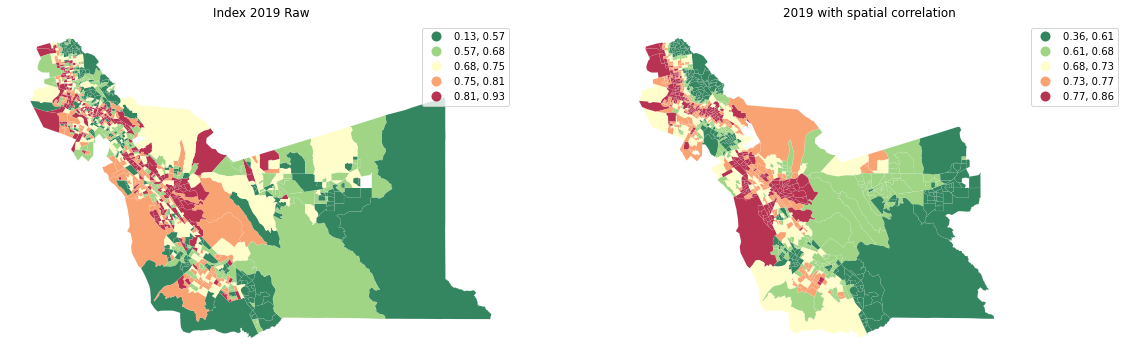

In [9]:
# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

# percent hispanic map on the left
gdf.plot(ax=ax1,
         figsize=(15,15),
         column='iqv_2019',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles',
        edgecolor='white',
        linewidth=0.1,)


ax1.axis("off")
ax1.set_title("Index 2019 Raw")

# percent black map on the right
gdf_bg.plot(ax=ax2,
         column='iqv_2019_lag',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles',
         edgecolor='white',
         linewidth=0.1)

ax2.axis("off")
ax2.set_title("2019 with spatial correlation")
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


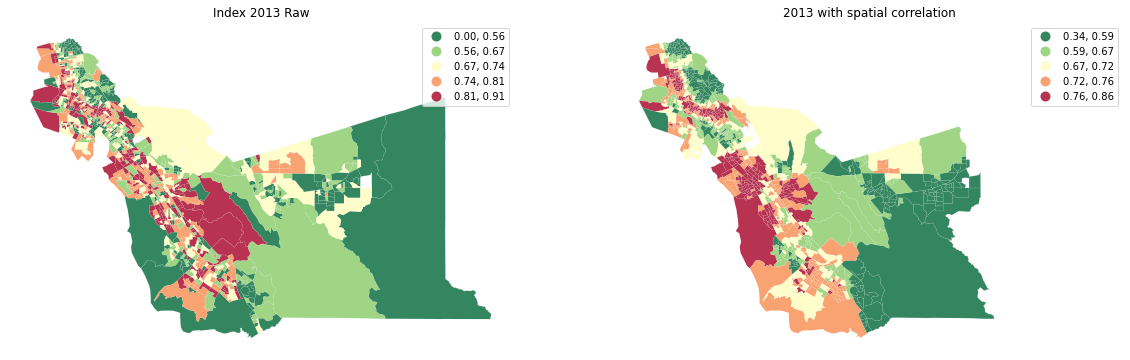

In [10]:
# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

# percent hispanic map on the left
gdf.plot(ax=ax1,
         figsize=(15,15),
         column='iqv_2013',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles',
        edgecolor='white',
        linewidth=0.1,)


ax1.axis("off")
ax1.set_title("Index 2013 Raw")

# percent black map on the right
gdf_bg.plot(ax=ax2,
         column='iqv_2013_lag',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles',
         edgecolor='white',
         linewidth=0.1)

ax2.axis("off")
ax2.set_title("2013 with spatial correlation")
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:860: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:860: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


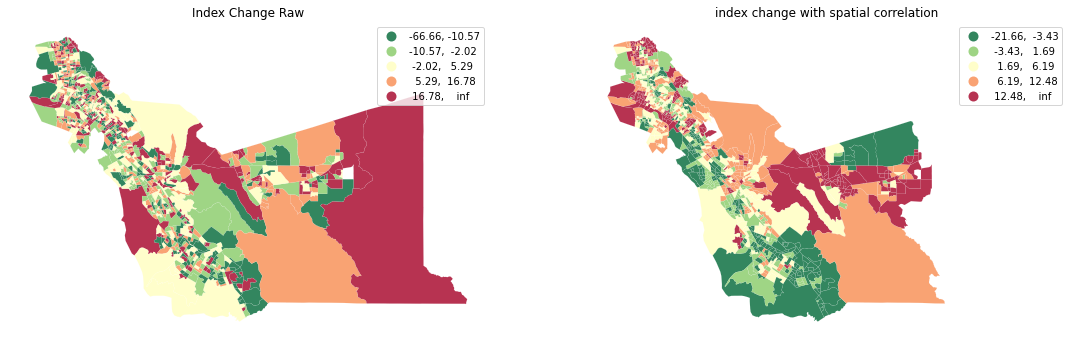

In [13]:
# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(19, 19), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

# percent hispanic map on the left
gdf.plot(ax=ax1,
         figsize=(15,15),
         column='index_change',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles',
        edgecolor='white',
        linewidth=0.1,)


ax1.axis("off")
ax1.set_title("Index Change Raw")

# percent black map on the right
gdf_bg.plot(ax=ax2,
         column='index_change_lag',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles',
         edgecolor='white',
         linewidth=0.1)

ax2.axis("off")
ax2.set_title("index change with spatial correlation")
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)